In [1]:
# Import necessary libraries
import tensorflow as tf
import os
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


In [3]:

img_width, img_height = 224, 224  # Adjust according to your image size
class_names = sorted(os.listdir('tomato_new')) 

In [4]:
# Load the saved model
model = load_model('TomatoModel.h5')

In [5]:
def predict_image(image_path):
    try:
        # Load and preprocess the image
        img = load_img(image_path, target_size=(img_width, img_height))
        img_array = img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        # Make prediction
        predictions = model.predict(img_array)
        predicted_class = np.argmax(predictions, axis=1)
        confidence = np.max(predictions)

        return class_names[predicted_class[0]], confidence
    except Exception as e:
        print(f"Error processing image: {e}")
        return None, None


In [6]:
# Function to display the image
def display_image(image_path):
    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

1/1 [==============================] - 0s 111ms/step
Predicted class: Tomato___Leaf_Mold with confidence: 0.96


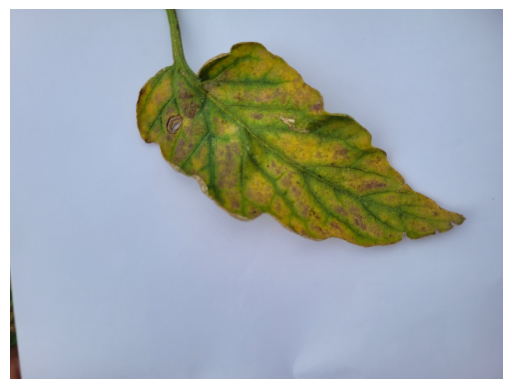

In [10]:
# Usage example
image_path = 'm12345.jpeg'  # Replace with the path to the image you want to predict
predicted_class, confidence = predict_image(image_path)
if predicted_class is not None:
    print(f"Predicted class: {predicted_class} with confidence: {confidence:.2f}")
    display_image(image_path)
else:
    print("Failed to predict the class.")